In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv('/content/gdrive/MyDrive/Data/eduapp.csv', usecols=[0])

In [ ]:
df.head()

In [ ]:
from nltk.stem.lancaster import LancasterStemmer
from nltk.corpus import stopwords
import string
from textblob import TextBlob
from wordcloud import WordCloud

In [ ]:
df['comments'] = df['comments'].apply(str)

In [ ]:
 from textblob import TextBlob
#Function for getting subjectivity
def getSubjectivity(comments):
    return TextBlob(comments).sentiment.subjectivity

#Function for getting polarity
def getPolarity(comments):
    return TextBlob(comments).sentiment.polarity

#Creating new columns
df['Subjectivity'] = df['comments'].apply(getSubjectivity)
df['Polarity'] = df['comments'].apply(getPolarity)
df

In [ ]:
# define class
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
df['Class'] = df['Polarity'].apply(getAnalysis)


df

In [ ]:
df['Class'].value_counts()

In [ ]:
#new lebeling

def getAnalysis(score):
  if score < 0:
    return -1
  elif score == 0:
    return 0
  else:
    return 1
df['lebel'] = df['Polarity'].apply(getAnalysis)


df

In [ ]:
#visualize the frequent words
from wordcloud import WordCloud
# Plot the Word Cloud
all_Words = "".join([sentence for sentence in df['comments']])
wordCloud = WordCloud(width =800, height =500, random_state = 42, max_font_size = 100).generate(all_Words)
#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

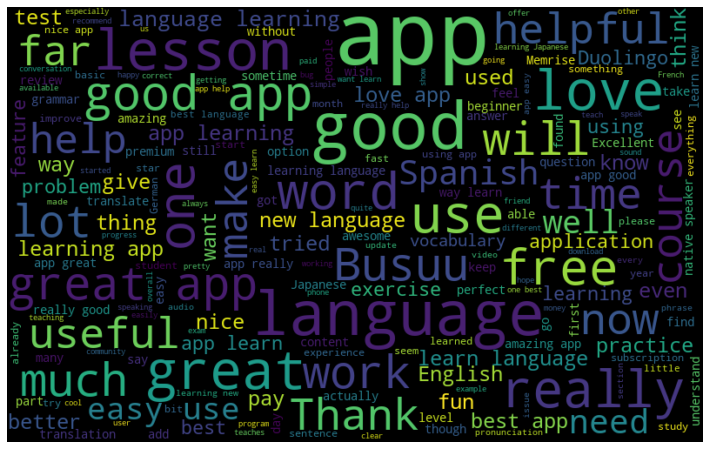

In [ ]:
#positive views
from wordcloud import WordCloud
all_Words = "".join([sentence for sentence in df['comments'][df['lebel']==1]])
wordCloud = WordCloud(width =800, height =500, random_state = 42, max_font_size = 100).generate(all_Words)
#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

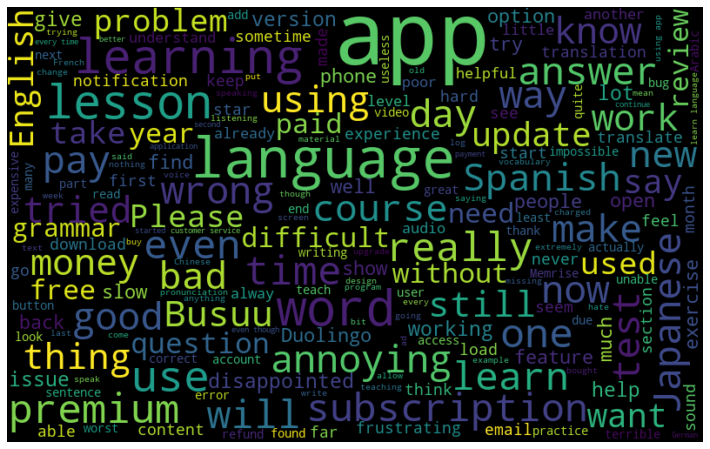

In [ ]:
#negative views
from wordcloud import WordCloud
# Plot the Word Cloud
all_Words = "".join([sentence for sentence in df['comments'][df['lebel']==-1]])
wordCloud = WordCloud(width =800, height =500, random_state = 42, max_font_size = 100).generate(all_Words)
#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

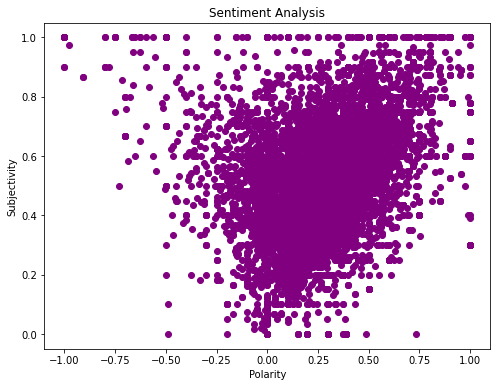

In [ ]:
# Scatter-Plot the polarity and subjectivity in graph
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='purple')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
# Get the percentage of positive reviews
pcomments = df[df.Class == 'Positive']
pcomments = pcomments['comments']
round((pcomments.shape[0]/df.shape[0]*100), 1)

82.9

In [ ]:
# Get the percentage of negative reviews
ncomment = df[df.Class == 'Negative']
ncomment = ncomment['comments']
round((ncomment.shape[0]/df.shape[0]*100), 1)

7.8

In [ ]:
# Get the percentage of neutral reviews
neucomment = df[df.Class == 'Neutral']
neucomment = neucomment['comments']
round((neucomment.shape[0]/df.shape[0]*100), 1)

9.2

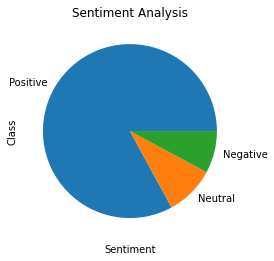

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Displaying the Sentiment Coutns
df['Class'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Class'].value_counts().plot(kind='pie')
plt.show()

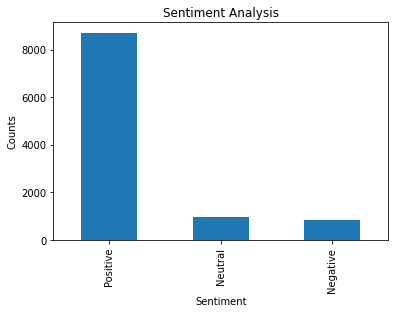

In [ ]:

# Displaying the Sentiment Coutns
df['Class'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Class'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
df.head(20)

In [ ]:
y = df['lebel']

In [ ]:
x = df.drop(['lebel','comments','Class'], axis=1)

In [ ]:
y

In [ ]:
x

In [ ]:
df['Class'].value_counts()

Positive    8705
Neutral      967
Negative     823
Name: Class, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lo = LogisticRegression()
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
from sklearn.svm import SVC
svc = SVC()
from xgboost import XGBClassifier
xgb = XGBClassifier()
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .2, random_state=1)

In [ ]:
lo.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lo.score(x_train, y_train)

0.978203906622201

In [ ]:
lo.score(x_test, y_test)

0.9795140543115769

In [ ]:
lo_pred = lo.predict(x_test)
lo_pred

array([ 1,  1,  1, ...,  1,  1, -1])

In [ ]:
lo_acc_scr = accuracy_score(y_test, lo_pred)
lo_acc_scr

0.9795140543115769

In [ ]:
lo_con_mat = confusion_matrix(y_test, lo_pred)
lo_con_mat

array([[ 169,   16,    5],
       [   0,  142,   15],
       [   0,    7, 1745]])

In [ ]:
lo_clf_rpt = classification_report(y_test, lo_pred)

In [ ]:
print(lo_clf_rpt)

              precision    recall  f1-score   support

          -1       1.00      0.89      0.94       190
           0       0.86      0.90      0.88       157
           1       0.99      1.00      0.99      1752

    accuracy                           0.98      2099
   macro avg       0.95      0.93      0.94      2099
weighted avg       0.98      0.98      0.98      2099



In [ ]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
knn.score(x_train, y_train)

0.9951167222486899

In [ ]:
knn.score(x_test, y_test)

0.9914244878513578

In [ ]:
knn_pred = knn.predict(x_test)
knn_pred

array([ 1,  1,  1, ...,  1,  1, -1])

In [ ]:
knn_acc_scr = accuracy_score(y_test, knn_pred)
knn_acc_scr

0.9914244878513578

In [ ]:
knn_con_mat = confusion_matrix(y_test, knn_pred)
knn_con_mat

array([[ 183,    6,    1],
       [   4,  153,    0],
       [   1,    6, 1745]])

In [ ]:
knn_clf_rpt = classification_report(y_test, knn_pred)

In [ ]:
print(knn_clf_rpt)

              precision    recall  f1-score   support

          -1       0.97      0.96      0.97       190
           0       0.93      0.97      0.95       157
           1       1.00      1.00      1.00      1752

    accuracy                           0.99      2099
   macro avg       0.97      0.98      0.97      2099
weighted avg       0.99      0.99      0.99      2099



In [ ]:
gnb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
gnb.score(x_train, y_train)

0.9685564554549786

In [ ]:
gnb.score(x_test, y_test)

0.9642686993806574

In [ ]:
gnb_pred = gnb.predict(x_test)
gnb_pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
gnb_acc_scr = accuracy_score(y_test, gnb_pred)
gnb_acc_scr

0.9642686993806574

In [ ]:
gnb_con_mat = confusion_matrix(y_test, gnb_pred)
gnb_con_mat

array([[ 115,    1,   74],
       [   0,  157,    0],
       [   0,    0, 1752]])

In [ ]:
gnb_clf_rpt = classification_report(y_test, gnb_pred)

In [ ]:
print(gnb_clf_rpt)

              precision    recall  f1-score   support

          -1       1.00      0.61      0.75       190
           0       0.99      1.00      1.00       157
           1       0.96      1.00      0.98      1752

    accuracy                           0.96      2099
   macro avg       0.98      0.87      0.91      2099
weighted avg       0.97      0.96      0.96      2099



In [ ]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dtc.score(x_train, y_train)

0.9997617913292044

In [ ]:
dtc.score(x_test, y_test)

0.9990471653168176

In [ ]:
dtc_pred = dtc.predict(x_test)
dtc_pred

array([ 1,  1,  1, ...,  1,  1, -1])

In [ ]:
dtc_acc_scr = accuracy_score(y_test, dtc_pred)
dtc_acc_scr

0.9990471653168176

In [ ]:
dtc_con_mat = confusion_matrix(y_test, dtc_pred)
dtc_con_mat

array([[ 188,    2,    0],
       [   0,  157,    0],
       [   0,    0, 1752]])

In [ ]:
dtc_clf_rpt = classification_report(y_test, dtc_pred)

In [ ]:
print(dtc_clf_rpt)

              precision    recall  f1-score   support

          -1       1.00      0.99      0.99       190
           0       0.99      1.00      0.99       157
           1       1.00      1.00      1.00      1752

    accuracy                           1.00      2099
   macro avg       1.00      1.00      1.00      2099
weighted avg       1.00      1.00      1.00      2099



In [ ]:
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf.score(x_train, y_train)

0.9997617913292044

In [ ]:
rf.score(x_test, y_test)

0.9990471653168176

In [ ]:
rf_pred = rf.predict(x_test)
rf_pred

array([ 1,  1,  1, ...,  1,  1, -1])

In [ ]:
rf_acc_scr = accuracy_score(y_test, rf_pred)
rf_acc_scr

0.9990471653168176

In [ ]:
rf_con_mat = confusion_matrix(y_test, rf_pred)
rf_con_mat

array([[ 188,    2,    0],
       [   0,  157,    0],
       [   0,    0, 1752]])

In [ ]:
rf_clf_rpt = classification_report(y_test, rf_pred)

In [ ]:
print(rf_clf_rpt)

              precision    recall  f1-score   support

          -1       1.00      0.99      0.99       190
           0       0.99      1.00      0.99       157
           1       1.00      1.00      1.00      1752

    accuracy                           1.00      2099
   macro avg       1.00      1.00      1.00      2099
weighted avg       1.00      1.00      1.00      2099



In [ ]:
svc.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svc.score(x_train, y_train)

0.9882086707956169

In [ ]:
svc.score(x_test, y_test)

0.9928537398761315

In [ ]:
svc_pred = svc.predict(x_test)
svc_pred

array([ 1,  1,  1, ...,  1,  1, -1])

In [ ]:
svc_acc_scr = accuracy_score(y_test, svc_pred)
svc_acc_scr

0.9928537398761315

In [ ]:
svc_con_mat = confusion_matrix(y_test, svc_pred)
svc_con_mat

array([[ 184,    5,    1],
       [   0,  150,    7],
       [   0,    2, 1750]])

In [ ]:
svc_clf_rpt = classification_report(y_test, svc_pred)

In [ ]:
print(svc_clf_rpt)

              precision    recall  f1-score   support

          -1       1.00      0.97      0.98       190
           0       0.96      0.96      0.96       157
           1       1.00      1.00      1.00      1752

    accuracy                           0.99      2099
   macro avg       0.98      0.97      0.98      2099
weighted avg       0.99      0.99      0.99      2099



In [ ]:
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
xgb.score(x_train, y_train)

1.0

In [ ]:
xgb.score(x_test, y_test)

1.0

In [ ]:
xgb_pred = xgb.predict(x_test)
xgb_pred

array([ 1,  1,  1, ...,  1,  1, -1])

In [ ]:
xgb_acc_scr = accuracy_score(y_test, xgb_pred)
xgb_acc_scr

1.0

In [ ]:
xgb_con_mat = confusion_matrix(y_test, xgb_pred)
xgb_con_mat

array([[ 190,    0,    0],
       [   0,  157,    0],
       [   0,    0, 1752]])

In [ ]:
xgb_clf_rpt = classification_report(y_test, xgb_pred)

In [ ]:
print(xgb_clf_rpt)

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       190
           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00      1752

    accuracy                           1.00      2099
   macro avg       1.00      1.00      1.00      2099
weighted avg       1.00      1.00      1.00      2099



In [ ]:
print(svc_clf_rpt)

              precision    recall  f1-score   support

          -1       1.00      0.97      0.98       190
           0       0.96      0.96      0.96       157
           1       1.00      1.00      1.00      1752

    accuracy                           0.99      2099
   macro avg       0.98      0.97      0.98      2099
weighted avg       0.99      0.99      0.99      2099



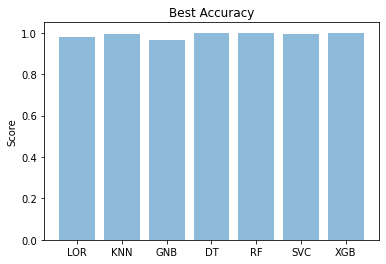

In [ ]:
objects = ('LOR','KNN','GNB','DT','RF','SVC','XGB')
y_pos = np.arange(len(objects))
performance = [lo_acc_scr,knn_acc_scr,gnb_acc_scr,dtc_acc_scr,rf_acc_scr, svc_acc_scr, xgb_acc_scr]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Score')
plt.title('Best Accuracy')
plt.show()

In [ ]:
from sklearn.datasets import make_classification

In [ ]:
from sklearn.metrics import plot_confusion_matrix

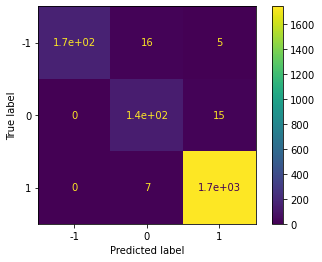

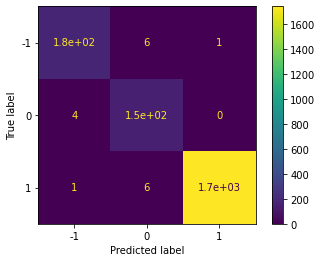

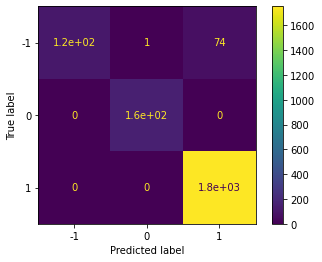

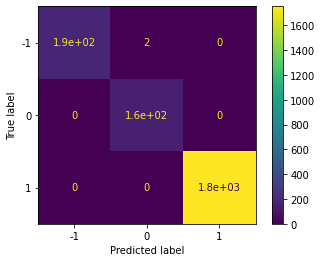

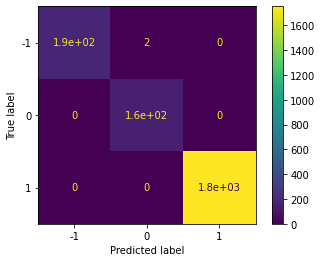

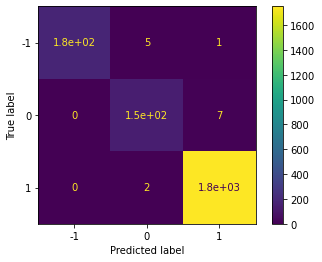

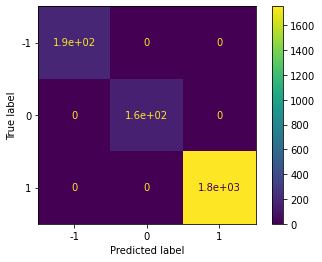

In [ ]:
plot_confusion_matrix(lo, x_test, y_test)
plot_confusion_matrix(knn, x_test, y_test)
plot_confusion_matrix(gnb, x_test, y_test)
plot_confusion_matrix(dtc, x_test, y_test)
plot_confusion_matrix(rf, x_test, y_test)
plot_confusion_matrix(svc, x_test, y_test)
plot_confusion_matrix(xgb, x_test, y_test)